# Homework4: Instructions

1) Write down 3 questions and their brief answers on the reading material. [2 Points]

$\textbf{Question}$: What are Support vector machines?

$Answer$: SVMs are elegant and highly principled learning methods for the design of a feedforward network with a single hidden layer of nonlinear units. Its derivation follows the principle of structural risk minimization and it is rooted in VC dimension theory. They are used for pattern classification and non-linear regression.

$\textbf{Question}$: Name the three types of learning machines that use Support vector machine?

$Answer$: 
a. Polynomial learning machine.<br>
b. Radial-basis function network.<br>
c. Two-layer perceptrons

$\textbf{Question}$: What are support vectors?

$Answer$: Support vectors are the datapoints which satisfy either of the constraints with the equality sign.

$W_{0}^{T}x_{i} + b_{0} >= 1$   for $d_{i}$ = +1

$W_{0}^{T}x_{i} + b_{0} <= -1$  for $d_{i}$ = -1

These vectors lie close to the decision surface and are therefore the most difficult to classify. As such, they have a direct bearing on the optimum location of the decision surface.

2) SVM 1-D Understanding  

The graphs below represent three different one-dimensional classification (dichotomization) tasks (along a sketched x-axis, dash means 'no data point').

What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries?
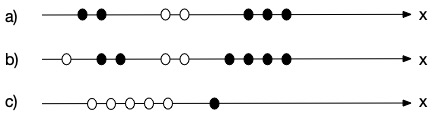 [8 points]


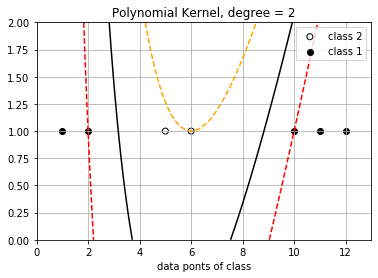

lowest order polynomial to fit the given data is: 2


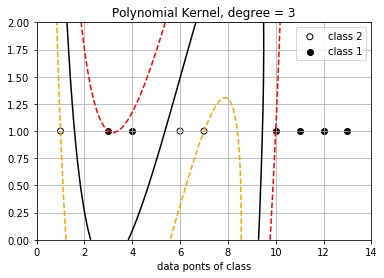

lowest order polynomial to fit the given data is: 3


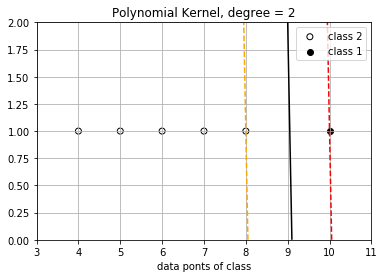

lowest order polynomial to fit the given data is: 2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def poly_kernel(X_data, y_label):
    '''plots and returns the decision boundaries and the lowest order polynomial for the given data'''
    X_data = np.expand_dims(X_data,1)
    dummy = np.ones((len(X_data),1),int)
    X_data = np.hstack((X_data, dummy))
    
    # lower and upper bound of data for decision doundary
    lower_bound_X1, upper_bound_X1 = np.min(X_data[:,0])-1, np.max(X_data[:,0])+1
    lower_bound_X2, upper_bound_X2 = np.min(X_data[:,1])-1, np.max(X_data[:,1])+1
    
    for d in range(0,10):
        clf = svm.SVC(kernel='poly', degree=d, coef0=3, gamma=0.2)
        clf.fit(X_data,y_label)
        predictions = clf.predict(X_data)
        if np.all(predictions==y_label):
            break
            
    # plotting of decision boundaries
    X,Y = np.mgrid[lower_bound_X1:upper_bound_X1:100j,lower_bound_X2:upper_bound_X2:100j]
    Z = clf.decision_function(np.c_[X.ravel(),Y.ravel()]).reshape(X.shape)
#     Z = np.reshape(Z, X.shape)
    plt.contour(X,Y,Z,colors=['orange','black','red'], linestyles=['--','-','--'],levels=[-1,0,1])
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none')
    plt.scatter(X_data[np.where(y_label<0),0],X_data[np.where(y_label<0),1],edgecolors='black',label='class 2',facecolors='none')
    plt.scatter(X_data[np.where(y_label>0),0],X_data[np.where(y_label>0),1],c='black',label='class 1')
    plt.title('Polynomial Kernel, degree = '+str(d))
    plt.xlabel('data ponts of class')
    plt.legend()
    plt.grid()
    plt.show()
    
    return d

#for case a
data_a = np.array([1,2,5,6,10,11,12])
y_a = np.array([1,1,-1,-1,1,1,1])
d = poly_kernel(data_a, y_a)
print("lowest order polynomial to fit the given data is:", d)
#for case b
data_b = np.array([1,3,4,6,7,10,11,12,13])
y_b = np.array([-1,1,1,-1,-1,1,1,1,1])
d = poly_kernel(data_b, y_b)
print("lowest order polynomial to fit the given data is:", d)
#for case c
data_c = np.array([4,5,6,7,8,10])
y_c = np.array([-1,-1,-1,-1,-1, 1])
d = poly_kernel(data_c, y_c)
print("lowest order polynomial to fit the given data is:", d)

3) In Haykin 2ed, P6.14 shows a set of data points corresponding to two classes C1 and C2. Both coordinates x1 and x2 range from -1 to +1. Using the radial-basis function kernel  

K(x,t) = exp(-(|| x - t ||^2))  
construct the optimal hyperplane for the following data set. 

mypositive=[
-1/2 3/4+1/16
-1/2 3/4-1/16 
-3/8 3/4+1/16
-3/8 3/4-1/16
-1/4 3/4+1/16 
-1/4 3/4-1/16
-1/8 1/2+1/16
-1/8 3/4
0 1/2
0 3/4
1/8 -3/4-3/16
1/8 -3/4
1/8 -1/2-1/16
1/8 -1/2+1/16
1/8 1/4 
1/8 1/4+3/16
1/8 1/2+2/16
1/4 -3/4-2/16
1/4 -1/2-2/16
1/4 -1/16
1/4 2/16
1/4 1/4+1/16
1/4 1/2
3/8 -1/4-2/16
3/8 -3/16
3/8 1/16
3/8 1/4
1/2 -1/16
];  

mynegative=[ -1/2 1/2
-3/8 -1/2
-3/8 1/4+1/16
-3/8 1/2
-1/4 -3/4-1/16
-1/4 -3/4+1/16
-1/4 -3/16
-1/4 2/16
-1/4 1/4+1/16
-1/4 1/2-1/16
-1/8 -3/4-2/16
-1/8 -3/4
-1/8 -1/2-1/16
-1/8 -1/4-2/16
-1/8 -1/4
-1/8 3/16
-1/8 1/4+1/16
0 -1/4
0 1/16
1/16 -1/16
];

You result classification should looks as the following:
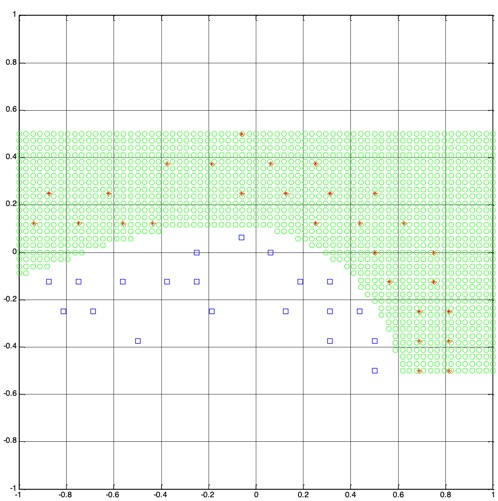

/home/shravanthi/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


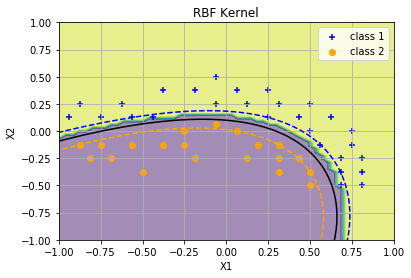

In [3]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def rbf_kernel(X_data, y_label, class_pos, class_neg):
    '''fits the given dataset using the radial basis function kernel and plots the decesion boundary'''
    clf = svm.SVC(kernel='rbf', gamma=0.3, C=80)
    clf.fit(X_data, y_label)
    
    # Getting lower and upper bounds of data
    lower_bound_X1, upper_bound_X1 = np.min(X_data[:,0])-1, np.max(X_data[:,0])+1
    lower_bound_X2, upper_bound_X2 = np.min(X_data[:,1])-1, np.max(X_data[:,1])+1
    
    # Plotting decision boundary
    X,Y = np.mgrid[lower_bound_X1:upper_bound_X1:100j,lower_bound_X2:upper_bound_X2:100j]
    Z = clf.decision_function(np.c_[X.ravel(),Y.ravel()])
    Z = Z.reshape(X.shape)


    plt.contourf(X,Y,Z>0.5, alpha=0.5)
    plt.contour(X,Y,Z,colors=['orange','black','blue'], linestyles=['--','-','--'],levels=[-1,0,1])
    plt.scatter(class_pos[:,0], class_pos[:,1], color='blue', marker='+', label = 'class 1')
    plt.scatter(class_neg[:,0], class_neg[:,1], color='orange', label = 'class 2')
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.title('RBF Kernel')
    plt.grid()
    plt.show()

#data from the question
my_positive = np.array([[ 0.8125, -0.5],[ 0.6875, -0.5],[ 0.8125, -0.375 ],
                        [ 0.6875, -0.375 ],[ 0.8125, -0.25],[ 0.6875, -0.25],
                        [ 0.5625, -0.125 ],[ 0.75  , -0.125 ],[ 0.5   ,  0.    ],
                        [ 0.75  ,  0.    ],[-0.9375,  0.125 ],[-0.75  ,  0.125 ],
                        [-0.5625,  0.125 ],[-0.4375,  0.125 ],[ 0.25  ,  0.125 ],
                        [ 0.4375,  0.125 ],[ 0.625 ,  0.125 ],[-0.875 ,  0.25  ],
                        [-0.625 ,  0.25  ],[-0.0625,  0.25  ],[ 0.125 ,  0.25  ],
                        [ 0.3125,  0.25  ],[ 0.5   ,  0.25  ],[-0.375 ,  0.375 ],
                        [-0.1875,  0.375 ],[ 0.0625,  0.375 ],[ 0.25  ,  0.375 ],
                        [-0.0625,  0.5   ]])

my_negetive = np.array([[ 0.5   , -0.5   ],[-0.5   , -0.375 ],[ 0.3125, -0.375 ],
                       [ 0.5   , -0.375 ],[-0.8125, -0.25  ],[-0.6875, -0.25  ],
                       [-0.1875, -0.25  ],[ 0.125 , -0.25  ],[ 0.3125, -0.25  ],
                       [ 0.4375, -0.25  ],[-0.875 , -0.125 ],[-0.75  , -0.125 ],
                       [-0.5625, -0.125 ],[-0.375 , -0.125 ],[-0.25  , -0.125 ],
                       [ 0.1875, -0.125 ],[ 0.3125, -0.125 ],[-0.25  ,  0.    ],
                       [ 0.0625,  0.    ],[-0.0625,  0.0625]])


pos_label = np.ones((len(my_positive),1),int)
neg_label = -np.ones((len(my_negetive),1),int)
X = np.vstack((my_positive, my_negetive))
y = np.vstack((pos_label, neg_label))

rbf_kernel(X, y, my_positive, my_negetive)

Authors: <br>

Shravanthi Arvind Patil.<br>
Sreenivasa Hikkal Venugopala.